# Performance test algorithms

In [14]:
def generate_lambda(arity, implementation):
    parameters = ""
    for i in range(arity):
        if i > 0:
            parameters += ", "
        parameters += f"a{i}: Int"
    if arity > 0:
        parameters += " -> "
    result = "{" + parameters + implementation + "}"
    return result

In [15]:
for i in range(500):
    lambdaDef = generate_lambda(1, "println(\"a0: $a0\")")
    print(f"val lambda{i} = {lambdaDef}")

val lambda0 = {a0: Int -> println("a0: $a0")}
val lambda1 = {a0: Int -> println("a0: $a0")}
val lambda2 = {a0: Int -> println("a0: $a0")}
val lambda3 = {a0: Int -> println("a0: $a0")}
val lambda4 = {a0: Int -> println("a0: $a0")}
val lambda5 = {a0: Int -> println("a0: $a0")}
val lambda6 = {a0: Int -> println("a0: $a0")}
val lambda7 = {a0: Int -> println("a0: $a0")}
val lambda8 = {a0: Int -> println("a0: $a0")}
val lambda9 = {a0: Int -> println("a0: $a0")}
val lambda10 = {a0: Int -> println("a0: $a0")}
val lambda11 = {a0: Int -> println("a0: $a0")}
val lambda12 = {a0: Int -> println("a0: $a0")}
val lambda13 = {a0: Int -> println("a0: $a0")}
val lambda14 = {a0: Int -> println("a0: $a0")}
val lambda15 = {a0: Int -> println("a0: $a0")}
val lambda16 = {a0: Int -> println("a0: $a0")}
val lambda17 = {a0: Int -> println("a0: $a0")}
val lambda18 = {a0: Int -> println("a0: $a0")}
val lambda19 = {a0: Int -> println("a0: $a0")}
val lambda20 = {a0: Int -> println("a0: $a0")}
val lambda21 = {a0: Int

# New performance analysis (16/5) (Ubuntu)

In [16]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data    = pd.read_csv("test/ubuntu/benchmark.csv")
data_lg = pd.read_csv("test-lambda-groups/ubuntu/benchmark.csv")
data_pg    = pd.read_csv("test-pg-lambda-groups/ubuntu/benchmark.csv")
data_r8 = pd.read_csv("test-r8/ubuntu/benchmark.csv")

In [18]:
data["jfr_benchmark"] = data["Benchmark"].apply(lambda val: "jfr" in val)
data_lg["jfr_benchmark"] = data_lg["Benchmark"].apply(lambda val: "jfr" in val)

In [19]:
data    = data.query("not jfr_benchmark")
data_lg = data_lg.query("not jfr_benchmark")

In [20]:
replace_comma_for_dot = lambda val: float(str(val).replace(",", "."))

In [21]:
def replace_comma_for_dot_in_column(data, column):
    data[column] = data[column].apply(replace_comma_for_dot)

In [22]:
def replace_comma_for_dot_in_score_column(data):
    return replace_comma_for_dot_in_column(data, "Score")

In [23]:
def df_to_name(df, index) -> str:
    if index == 0: # or df == data:
        return "No transformations"
    elif index == 1: # or df == data_lg:
        return "ProGuard with lambda merging"
    elif index == 2: # or df == data_pg:
        return "ProGuard with shrinking, lambda merging and optimisation"
    elif index == 3: # or df == data_r8:
        return "R8 with shrinking and optimisation (target: dex)"
    else:
        return "Unknown dataframe"

In [24]:
def apply_to_each_dataframe(function, print_df_name=False):
    for index, df in enumerate([data, data_lg, data_pg, data_r8]):
        if print_df_name:
            print(df_to_name(df, index))
            function(df, df_to_name(df, index))
        else:
            function(df)

In [25]:
apply_to_each_dataframe(replace_comma_for_dot_in_score_column)

In [26]:
def replace_comma_for_dot_in_error_column(data):
    return replace_comma_for_dot_in_column(data, "Score Error (99,9%)")

In [27]:
apply_to_each_dataframe(replace_comma_for_dot_in_error_column)

In [28]:
data.head()

,Benchmark,Mode,Threads,Samples,Score,"Score Error (99,9%)",Unit,jfr_benchmark
0,test.MyBenchmark.closure2FreeVariables3Million...,thrpt,1,25,42.163108,0.068939,ops/s,False
1,test.MyBenchmark.closure6FreeVariables3Million...,thrpt,1,25,26.177601,0.042845,ops/s,False
2,test.MyBenchmark.closure9FreeVariables3Million...,thrpt,1,25,18.807198,0.009070,ops/s,False
3,test.MyBenchmark.closure13FreeVariables3Millio...,thrpt,1,25,13.604294,0.103989,ops/s,False
4,test.MyBenchmark.closure16FreeVariables3Millio...,thrpt,1,25,11.811881,0.008830,ops/s,False


In [29]:
data_lg.head()

,Benchmark,Mode,Threads,Samples,Score,"Score Error (99,9%)",Unit,jfr_benchmark
0,test.MyBenchmark.emptyClosure13Arguments3Milli...,thrpt,1,25,1.359417e+01,0.084804,ops/s,False
1,test.MyBenchmark.emptyClosure16Arguments3Milli...,thrpt,1,25,9.929137e+00,0.288628,ops/s,False
2,test.MyBenchmark.emptyClosure2Arguments3Millio...,thrpt,1,25,9.962950e+08,30233.861638,ops/s,False
3,test.MyBenchmark.emptyClosure6Arguments3Millio...,thrpt,1,25,9.960183e+08,963534.060782,ops/s,False
4,test.MyBenchmark.emptyClosure9Arguments3Millio...,thrpt,1,25,2.399210e+01,0.169623,ops/s,False


In [30]:
data_pg.head()

,Benchmark,Mode,Threads,Samples,Score,"Score Error (99,9%)",Unit
0,test.MyBenchmark.closure11FreeVariables3Millio...,thrpt,1,25,44.242019,0.211287,ops/s
1,test.MyBenchmark.closure11FreeVariables3Millio...,thrpt,1,25,7.939237,0.015364,ops/s
2,test.MyBenchmark.closure13FreeVariables3Millio...,thrpt,1,25,41.857858,0.591009,ops/s
3,test.MyBenchmark.closure13FreeVariables3Millio...,thrpt,1,25,7.939407,0.006395,ops/s
4,test.MyBenchmark.closure15FreeVariables3Millio...,thrpt,1,25,37.952371,0.251965,ops/s


In [31]:
data_r8.head()

,Benchmark,Mode,Threads,Samples,Score,"Score Error (99,9%)",Unit
0,test.MyBenchmark.closure11FreeVariables3Millio...,thrpt,1,25,41.573513,0.083068,ops/s
1,test.MyBenchmark.closure13FreeVariables3Millio...,thrpt,1,25,41.267932,0.122207,ops/s
2,test.MyBenchmark.closure15FreeVariables3Millio...,thrpt,1,25,41.650611,0.146926,ops/s
3,test.MyBenchmark.closure16FreeVariables3Millio...,thrpt,1,25,41.572001,0.183935,ops/s
4,test.MyBenchmark.closure19FreeVariables3Millio...,thrpt,1,25,41.399847,0.129321,ops/s


In [32]:
def calculate_error_bounds(data):
    data["Score - error"] = data["Score"] - data["Score Error (99,9%)"]
    data["Score + error"] = data["Score"] + data["Score Error (99,9%)"]

In [33]:
apply_to_each_dataframe(calculate_error_bounds)

In [34]:
calculate_inverse = lambda val: val**(-1)

In [35]:
def calculate_inverse_scores(data):
    data["inverse score"] = data["Score"].apply(calculate_inverse)
    data["inverse lower score"] = data["Score - error"].apply(calculate_inverse)
    data["inverse upper score"] = data["Score + error"].apply(calculate_inverse)

In [36]:
apply_to_each_dataframe(calculate_inverse_scores)

In [37]:
def get_closure_size_from_benchmark(benchmark):
    benchmark = benchmark.replace("InstantiationsAnd", "")
    benchmark = benchmark.replace("test.MyBenchmark.closure", "")
    benchmark = benchmark.replace("FreeVariables3MillionCalls", "")
    benchmark = benchmark.replace("FreeVariables3MillionInstantiations", "")
    try:
        closure_size = int(benchmark)
        return closure_size
    except Exception as exc:
        return 0

In [38]:
def get_arity_from_benchmark(benchmark):
    benchmark = benchmark.replace("InstantiationsAnd", "")
    benchmark = benchmark.replace("test.MyBenchmark.emptyClosure", "")
    benchmark = benchmark.replace("Arguments3MillionCalls", "")
    try:
        arity = int(benchmark)
        return arity
    except Exception:
        return 0

In [39]:
def add_closure_size(data):
    data["closure_size"] = data["Benchmark"].apply(get_closure_size_from_benchmark)

In [40]:
def add_arity(data):
    data["arity"] = data["Benchmark"].apply(get_arity_from_benchmark)

In [41]:
apply_to_each_dataframe(add_closure_size)
apply_to_each_dataframe(add_arity)

In [42]:
def add_test_type(data):
    data["closure_test"] = data["Benchmark"].apply(lambda val: val.startswith("test.MyBenchmark.closure") and "FreeVariables" in val)
    data["arity_test"] = data["Benchmark"].apply(lambda val: val.startswith("test.MyBenchmark.emptyClosure") and "Arguments3Million" in val)
    data["instantiation_test"] = data["Benchmark"].apply(lambda val: "Instantiations" in val)
    data["invocation_test"] = data["Benchmark"].apply(lambda val: "Calls" in val)

In [43]:
apply_to_each_dataframe(add_test_type)

In [44]:
data[["Benchmark", "closure_size", "arity", "closure_test", "arity_test", "instantiation_test", "invocation_test"]].head()

,Benchmark,closure_size,arity,closure_test,arity_test,instantiation_test,invocation_test
0,test.MyBenchmark.closure2FreeVariables3Million...,2,0,True,False,True,False
1,test.MyBenchmark.closure6FreeVariables3Million...,6,0,True,False,True,False
2,test.MyBenchmark.closure9FreeVariables3Million...,9,0,True,False,True,False
3,test.MyBenchmark.closure13FreeVariables3Millio...,13,0,True,False,True,False
4,test.MyBenchmark.closure16FreeVariables3Millio...,16,0,True,False,True,False


In [45]:
data_lg[["Benchmark", "closure_size", "arity", "closure_test", "arity_test", "instantiation_test", "invocation_test"]].head()

,Benchmark,closure_size,arity,closure_test,arity_test,instantiation_test,invocation_test
0,test.MyBenchmark.emptyClosure13Arguments3Milli...,0,13,False,True,False,True
1,test.MyBenchmark.emptyClosure16Arguments3Milli...,0,16,False,True,False,True
2,test.MyBenchmark.emptyClosure2Arguments3Millio...,0,2,False,True,False,True
3,test.MyBenchmark.emptyClosure6Arguments3Millio...,0,6,False,True,False,True
4,test.MyBenchmark.emptyClosure9Arguments3Millio...,0,9,False,True,False,True


In [46]:
data_pg[["Benchmark", "closure_size", "arity", "closure_test", "arity_test", "instantiation_test", "invocation_test"]].head()

,Benchmark,closure_size,arity,closure_test,arity_test,instantiation_test,invocation_test
0,test.MyBenchmark.closure11FreeVariables3Millio...,11,0,True,False,False,True
1,test.MyBenchmark.closure11FreeVariables3Millio...,11,0,True,False,True,False
2,test.MyBenchmark.closure13FreeVariables3Millio...,13,0,True,False,False,True
3,test.MyBenchmark.closure13FreeVariables3Millio...,13,0,True,False,True,False
4,test.MyBenchmark.closure15FreeVariables3Millio...,15,0,True,False,False,True


In [47]:
data_r8[["Benchmark", "closure_size", "arity", "closure_test", "arity_test", "instantiation_test", "invocation_test"]].head()

,Benchmark,closure_size,arity,closure_test,arity_test,instantiation_test,invocation_test
0,test.MyBenchmark.closure11FreeVariables3Millio...,11,0,True,False,True,False
1,test.MyBenchmark.closure13FreeVariables3Millio...,13,0,True,False,True,False
2,test.MyBenchmark.closure15FreeVariables3Millio...,15,0,True,False,True,False
3,test.MyBenchmark.closure16FreeVariables3Millio...,16,0,True,False,True,False
4,test.MyBenchmark.closure19FreeVariables3Millio...,19,0,True,False,True,False


No transformations
ProGuard with lambda merging
ProGuard with shrinking, lambda merging and optimisation
R8 with shrinking and optimisation (target: dex)


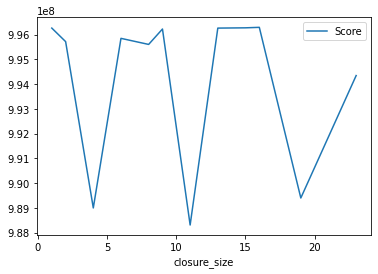

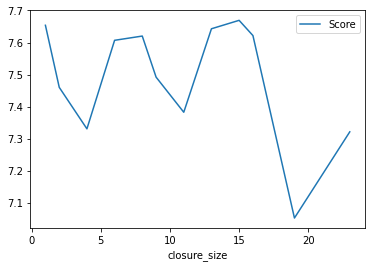

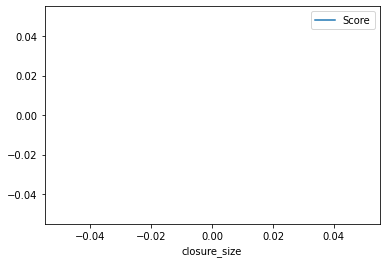

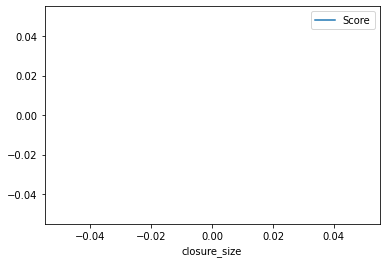

In [48]:
def plot_closure_instantiation_invocation_benchmark(data, df_name=""):
    try:
        data.sort_values(by="closure_size").query("closure_test and instantiation_test and invocation_test").plot.line(x="closure_size", y="Score")
    except Exception as exception:
        print(f"Exception for dataframe: {exception}")
apply_to_each_dataframe(plot_closure_instantiation_invocation_benchmark, True)

In [49]:
def round_if_no_comma(val):
    if round(val) == val:
        return round(val)
    return round(val, 1)

def ops_per_sec_formatter(val, val2):
    if val > 10**6:
        return f"{round_if_no_comma(val/10**6)}M ops/s"
    elif val > 10**3:
        return f"{round_if_no_comma(val/10**3)}K ops/s"
    return f"{round_if_no_comma(val)} ops/s"

No transformations
ProGuard with lambda merging
ProGuard with shrinking, lambda merging and optimisation
R8 with shrinking and optimisation (target: dex)


'\nax1 = data.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test").plot.line(x="closure_size", y="Score")\nax1.set_xlabel("closuregrootte")\nax1.set_ylabel("verwerkingscapaciteit voor \n3 miljoen functieoproepen")\nax1.set_title("Impact closuregrootte op verwerkingscapaciteit functieoproepen\nvoor lambda merging")\nax1.yaxis.set_major_formatter(lambda val, val2: f"{round(val/10**6)}M ops/s")\nplt.savefig("average-throughput-invocation-closure-before-lambda-merging-nl.pdf", bbox_inches=\'tight\')\nax2 = data_lg.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test").plot.line(x="closure_size", y="Score")\nax2.set_xlabel("closuregrootte")\nax2.set_ylabel("verwerkingscapaciteit voor \n3 miljoen functieoproepen")\nax2.set_title("Impact closuregrootte op verwerkingscapaciteit functieoproepen\nvoor lambda merging")\nax2.yaxis.set_major_formatter(lambda val, val2: f"{round(val)} ops/s")\nplt.savefig("av

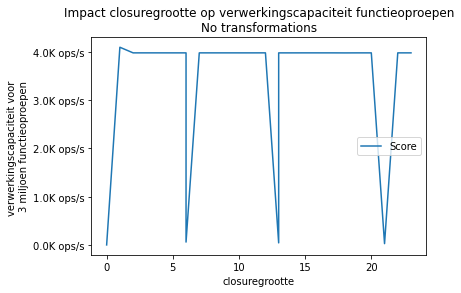

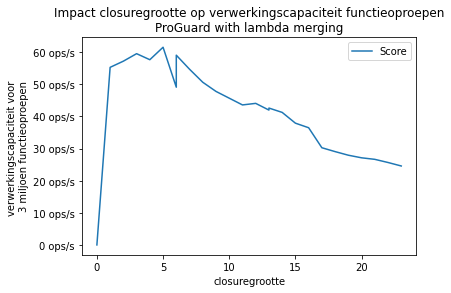

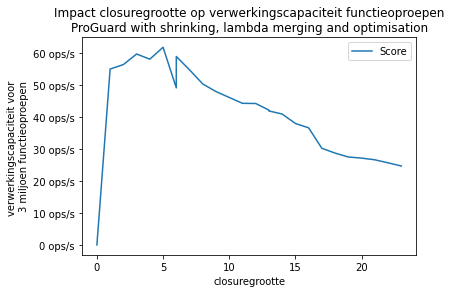

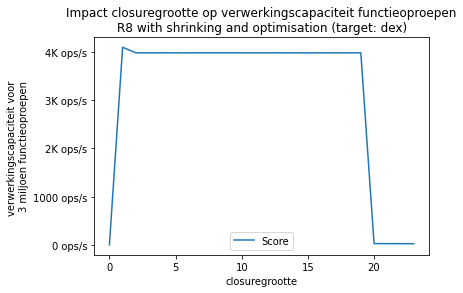

In [50]:
def plot_closure_invocation_benchmark(data, df_name=""):
    try:
        ax1 = data.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test").plot.line(x="closure_size", y="Score")
        ax1.set_xlabel("closuregrootte")
        ax1.set_ylabel("verwerkingscapaciteit voor \n3 miljoen functieoproepen")
        ax1.set_title(f"Impact closuregrootte op verwerkingscapaciteit functieoproepen\n{df_name}")
        if "No transformations" in df_name:
            ax1.yaxis.set_major_formatter(lambda val, val2: f"{round(val/10**3, 2)}K ops/s")
        else:
            ax1.yaxis.set_major_formatter(ops_per_sec_formatter)
        plt.savefig(f"average-throughput-invocation-closure-{df_name.replace(' ', '-')}-nl.pdf", bbox_inches='tight')
    except Exception as exception:
        print(f"Exception for dataframe: {exception}")
apply_to_each_dataframe(plot_closure_invocation_benchmark, True)
"""
ax1 = data.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test").plot.line(x="closure_size", y="Score")
ax1.set_xlabel("closuregrootte")
ax1.set_ylabel("verwerkingscapaciteit voor \n3 miljoen functieoproepen")
ax1.set_title("Impact closuregrootte op verwerkingscapaciteit functieoproepen\nvoor lambda merging")
ax1.yaxis.set_major_formatter(lambda val, val2: f"{round(val/10**6)}M ops/s")
plt.savefig("average-throughput-invocation-closure-before-lambda-merging-nl.pdf", bbox_inches='tight')
ax2 = data_lg.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test").plot.line(x="closure_size", y="Score")
ax2.set_xlabel("closuregrootte")
ax2.set_ylabel("verwerkingscapaciteit voor \n3 miljoen functieoproepen")
ax2.set_title("Impact closuregrootte op verwerkingscapaciteit functieoproepen\nvoor lambda merging")
ax2.yaxis.set_major_formatter(lambda val, val2: f"{round(val)} ops/s")
plt.savefig("average-throughput-invocation-closure-after-lambda-merging-nl.pdf", bbox_inches='tight')
"""

In [51]:
original_mean_score = data.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test")["Score"].mean() * 3_000_000
lg_mean_score       = data_lg.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test")["Score"].mean() * 3_000_000
pg_mean_score       = data_pg.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test")["Score"].mean() * 3_000_000
r8_mean_score       = data_r8.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test")["Score"].mean() * 3_000_000
print(f"Original mean score per lambda: {original_mean_score / 10**9}G ops/s")
print(f"ProGuard lambda merging mean score per lambda: {lg_mean_score / 10**6}M ops/s")
print(f"ProGuard shrinking, lambda merging, optimisation mean score per lambda: {pg_mean_score / 10**6}M ops/s")
print(f"R8 shrinking, optimisation mean score per lambda: {r8_mean_score / 10**9}G ops/s")

Original mean score per lambda: 10.061746457880002G ops/s
ProGuard lambda merging mean score per lambda: 123.73533384000001M ops/s
ProGuard shrinking, lambda merging, optimisation mean score per lambda: 123.58260048000001M ops/s
R8 shrinking, optimisation mean score per lambda: 9.580668706080003G ops/s


In [52]:
original_median_score = data.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test")["Score"].median() * 3_000_000
lg_median_score       = data_lg.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test")["Score"].median() * 3_000_000
pg_median_score       = data_pg.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test")["Score"].median() * 3_000_000
r8_median_score       = data_r8.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test")["Score"].median() * 3_000_000
print(f"Original median score per lambda: {original_median_score / 10**9}G ops/s")
print(f"ProGuard lambda merging median score per lambda: {lg_median_score / 10**6}M ops/s")
print(f"ProGuard shrinking, lambda merging, optimisation median score per lambda: {pg_median_score / 10**6}M ops/s")
print(f"R8 shrinking, optimisation median score per lambda: {r8_median_score / 10**9}G ops/s")

Original median score per lambda: 11.943387642G ops/s
ProGuard lambda merging median score per lambda: 127.759146M ops/s
ProGuard shrinking, lambda merging, optimisation median score per lambda: 126.387054M ops/s
R8 shrinking, optimisation median score per lambda: 11.943273504G ops/s


In [53]:
original_delay_ps = data.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test")["inverse score"].mean() / 3_000_000 * 10**12
lg_delay_ps = data_lg.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test")["inverse score"].mean() / 3_000_000 * 10**12
pg_delay_ps = data_pg.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test")["inverse score"].mean() / 3_000_000 * 10**12
r8_delay_ps = data_r8.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test")["inverse score"].mean() / 3_000_000 * 10**12
print(f"Original mean delay: {original_delay_ps}ps")
print(f"ProGuard lambda merging mean delay: {lg_delay_ps/10**3}ns")
print(f"ProGuard shrinking, lambda merging, optimisation mean delay: {pg_delay_ps/10**3}ns")
print(f"R8 shrinking, optimisation mean delay: {r8_delay_ps/10**3}ns")

Original mean delay: 459693.8506521883ps
ProGuard lambda merging mean delay: 473.57907724211725ns
ProGuard shrinking, lambda merging, optimisation mean delay: 457.8333788210231ns
R8 shrinking, optimisation mean delay: 464.0742296417931ns


In [54]:
original_median_delay_ps = data.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test")["inverse score"].median() / 3_000_000 * 10**12
lg_median_delay_ps = data_lg.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test")["inverse score"].median() / 3_000_000 * 10**12
pg_median_delay_ps = data_pg.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test")["inverse score"].median() / 3_000_000 * 10**12
r8_median_delay_ps = data_r8.sort_values(by="closure_size").query("closure_test and invocation_test and not instantiation_test")["inverse score"].median() / 3_000_000 * 10**12
print(f"Original median delay: {original_median_delay_ps}ps")
print(f"ProGuard lambda merging median delay: {lg_median_delay_ps/10**3}ns")
print(f"ProGuard shrinking, lambda merging, optimisation median delay: {pg_median_delay_ps/10**3}ns")
print(f"R8 shrinking, optimisation median delay: {r8_median_delay_ps}ps")

Original median delay: 83.72833822151178ps
ProGuard lambda merging median delay: 7.827228275304846ns
ProGuard shrinking, lambda merging, optimisation median delay: 7.9122027798828185ns
R8 shrinking, optimisation median delay: 83.72913838614542ps


No transformations
ProGuard with lambda merging
ProGuard with shrinking, lambda merging and optimisation
R8 with shrinking and optimisation (target: dex)


'\nax2 = data_lg.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test").plot.line(x="closure_size", y="Score")\nax2.set_xlabel("closuregrootte")\nax2.set_ylabel("verwerkingscapaciteit voor \n3 miljoen instantiaties")\nax2.set_title("Impact closuregrootte op verwerkingscapaciteit instantiaties\nna lambda merging")\nax2.yaxis.set_major_formatter(lambda val, val2: f"{round(val,2)} ops/s")\nplt.savefig("average-throughput-instantiation-after-lambda-merging-nl.pdf", bbox_inches=\'tight\')\n'

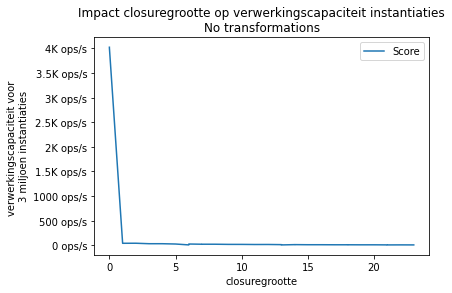

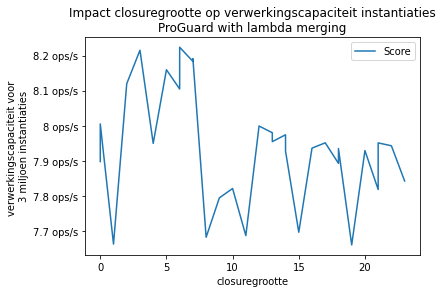

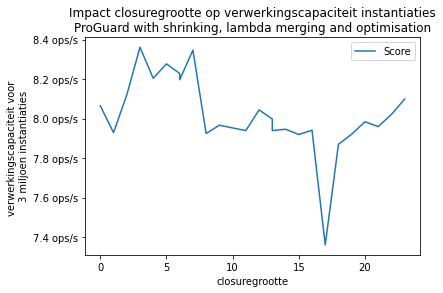

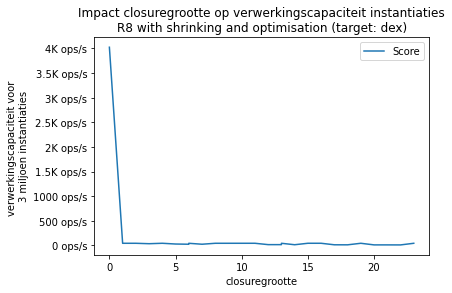

In [55]:
def plot_closure_instantiation(data, df_name=""):
    try:
        ax1 = data.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test").plot.line(x="closure_size", y="Score")
        ax1.set_xlabel("closuregrootte")
        ax1.set_ylabel("verwerkingscapaciteit voor \n3 miljoen instantiaties")
        ax1.set_title(f"Impact closuregrootte op verwerkingscapaciteit instantiaties\n{df_name}")
        if "ProGuard with shrinking" in df_name and "lambda merging" in df_name:
            ax1.yaxis.set_major_formatter(lambda val, val2: f"{round(val, 2)} ops/s")
        else:
            ax1.yaxis.set_major_formatter(ops_per_sec_formatter)
        plt.savefig(f"average-throughput-instantiation-{df_name.replace(' ', '-')}-nl.pdf", bbox_inches='tight')
    except Exception as exception:
        print(f"Exception for dataframe {df_name}: {exception}")
    
apply_to_each_dataframe(plot_closure_instantiation, True)
"""
ax2 = data_lg.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test").plot.line(x="closure_size", y="Score")
ax2.set_xlabel("closuregrootte")
ax2.set_ylabel("verwerkingscapaciteit voor \n3 miljoen instantiaties")
ax2.set_title("Impact closuregrootte op verwerkingscapaciteit instantiaties\nna lambda merging")
ax2.yaxis.set_major_formatter(lambda val, val2: f"{round(val,2)} ops/s")
plt.savefig("average-throughput-instantiation-after-lambda-merging-nl.pdf", bbox_inches='tight')
"""

In [56]:
data.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test").describe()

,Threads,Samples,Score,"Score Error (99,9%)",Score - error,Score + error,inverse score,inverse lower score,inverse upper score,closure_size,arity
count,31.0,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,1.0,25.0,275.601106,1.044875,274.556231,276.645981,0.069110,0.069336,0.068886,11.451613,0.0
std,0.0,0.0,999.610392,5.428739,995.836734,1003.399228,0.036998,0.037077,0.036922,7.008750,0.0
min,1.0,25.0,7.950992,0.004318,7.942441,7.959543,0.000248,0.000248,0.000247,0.000000,0.0
25%,1.0,25.0,10.410150,0.013931,10.386712,10.433587,0.041756,0.041868,0.041646,6.000000,0.0
50%,1.0,25.0,13.893507,0.036228,13.871628,13.915386,0.071976,0.072090,0.071863,12.000000,0.0
75%,1.0,25.0,24.123376,0.092920,24.063035,24.183717,0.096144,0.096366,0.095923,17.500000,0.0
max,1.0,25.0,4024.986860,30.292475,4024.823824,4045.177511,0.125770,0.125906,0.125635,23.000000,0.0


In [57]:
original_mean_score = data.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test")["Score"].mean() * 3_000_000
lg_mean_score       = data_lg.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test")["Score"].mean() * 3_000_000
pg_mean_score       = data_pg.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test")["Score"].mean() * 3_000_000
r8_mean_score       = data_r8.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test")["Score"].mean() * 3_000_000
print(f"Original mean score per lambda: {original_mean_score / 10**6}M ops/s")
print(f"ProGuard lambda merging mean score per lambda: {lg_mean_score / 10**6}M ops/s")
print(f"ProGuard shrinking, lambda merging, optimisation mean score per lambda: {pg_mean_score / 10**6}M ops/s")
print(f"R8 shrinking, optimisation mean score per lambda: {r8_mean_score / 10**6}M ops/s")

Original mean score per lambda: 826.8033178064518M ops/s
ProGuard lambda merging mean score per lambda: 23.81477516129032M ops/s
ProGuard shrinking, lambda merging, optimisation mean score per lambda: 24.067096199999998M ops/s
R8 shrinking, optimisation mean score per lambda: 565.3814260800001M ops/s


In [58]:
original_median_score = data.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test")["Score"].median() * 3_000_000
lg_median_score       = data_lg.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test")["Score"].median() * 3_000_000
pg_median_score       = data_pg.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test")["Score"].median() * 3_000_000
r8_median_score       = data_r8.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test")["Score"].median() * 3_000_000
print(f"Original median score per lambda: {original_median_score / 10**6}M ops/s")
print(f"ProGuard lambda merging median score per lambda: {lg_median_score / 10**6}M ops/s")
print(f"ProGuard shrinking, lambda merging, optimisation median score per lambda: {pg_median_score / 10**6}M ops/s")
print(f"R8 shrinking, optimisation median score per lambda: {r8_median_score / 10**6}M ops/s")

Original median score per lambda: 41.680521M ops/s
ProGuard lambda merging median score per lambda: 23.828349M ops/s
ProGuard shrinking, lambda merging, optimisation median score per lambda: 23.951841M ops/s
R8 shrinking, optimisation median score per lambda: 123.595053M ops/s


In [59]:
original_delay_ps = data.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test")["inverse score"].mean() / 3_000_000 * 10**12
lg_delay_ps = data_lg.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test")["inverse score"].mean() / 3_000_000 * 10**12
pg_delay_ps = data_pg.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test")["inverse score"].mean() / 3_000_000 * 10**12
r8_delay_ps = data_r8.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test")["inverse score"].mean() / 3_000_000 * 10**12
print(f"Original delay: {original_delay_ps/10**3}ns")
print(f"ProGuard lambda merging delay: {lg_delay_ps/10**3}ns")
print(f"ProGuard shrinking, lambda merging, optimisation delay: {pg_delay_ps/10**3}ns")
print(f"R8 shrinking, optimisation delay: {r8_delay_ps/10**3}ns")

Original delay: 23.036537443853632ns
ProGuard lambda merging delay: 42.0080831426347ns
ProGuard shrinking, lambda merging, optimisation delay: 41.575579032497316ns
R8 shrinking, optimisation delay: 16.266857530262126ns


In [60]:
original_median_delay_ps = data.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test")["inverse score"].median() / 3_000_000 * 10**12
lg_median_delay_ps = data_lg.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test")["inverse score"].median() / 3_000_000 * 10**12
pg_median_delay_ps = data_pg.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test")["inverse score"].median() / 3_000_000 * 10**12
r8_median_delay_ps = data_r8.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test")["inverse score"].median() / 3_000_000 * 10**12
print(f"Original median delay: {original_median_delay_ps/10**3}ns")
print(f"ProGuard lambda merging median delay: {lg_median_delay_ps/10**3}ns")
print(f"ProGuard shrinking, lambda merging, optimisation median delay: {pg_median_delay_ps/10**3}ns")
print(f"R8 shrinking, optimisation median delay: {r8_median_delay_ps/10**3}ns")

Original median delay: 23.992022556531865ns
ProGuard lambda merging median delay: 41.96681859914005ns
ProGuard shrinking, lambda merging, optimisation median delay: 41.75044415166249ns
R8 shrinking, optimisation median delay: 8.090938720662225ns


In [61]:
data_r8.sort_values(by="closure_size").query("closure_test and instantiation_test and not invocation_test")

,Benchmark,Mode,Threads,Samples,Score,"Score Error (99,9%)",Unit,Score - error,Score + error,inverse score,inverse lower score,inverse upper score,closure_size,arity,closure_test,arity_test,instantiation_test,invocation_test
37,test.MyBenchmark.closure0FreeVariables3Million...,thrpt,1,25,4024.920718,0.157043,ops/s,4024.763675,4025.077761,0.000248,0.000248,0.000248,0,0,True,False,True,False
5,test.MyBenchmark.closure1FreeVariables3Million...,thrpt,1,25,41.313424,0.149978,ops/s,41.163446,41.463402,0.024205,0.024293,0.024118,1,0,True,False,True,False
7,test.MyBenchmark.closure2FreeVariables3Million...,thrpt,1,25,41.433697,0.137585,ops/s,41.296112,41.571282,0.024135,0.024215,0.024055,2,0,True,False,True,False
51,test.MyBenchmark.closure3FreeVariables3Million...,thrpt,1,25,32.824269,0.281821,ops/s,32.542448,33.106090,0.030465,0.030729,0.030206,3,0,True,False,True,False
8,test.MyBenchmark.closure4FreeVariables3Million...,thrpt,1,25,41.524992,0.172999,ops/s,41.351993,41.697991,0.024082,0.024183,0.023982,4,0,True,False,True,False
53,test.MyBenchmark.closure5FreeVariables3Million...,thrpt,1,25,26.427420,0.120350,ops/s,26.307070,26.547770,0.037839,0.038013,0.037668,5,0,True,False,True,False
71,test.MyBenchmark.closure6FreeVariables3Million...,thrpt,1,25,22.040667,0.059168,ops/s,21.981499,22.099835,0.045371,0.045493,0.045249,6,0,True,False,True,False
9,test.MyBenchmark.closure6FreeVariables3Million...,thrpt,1,25,41.198351,0.182858,ops/s,41.015493,41.381209,0.024273,0.024381,0.024166,6,0,True,False,True,False
55,test.MyBenchmark.closure7FreeVariables3Million...,thrpt,1,25,22.174500,0.135092,ops/s,22.039408,22.309592,0.045097,0.045373,0.044824,7,0,True,False,True,False
10,test.MyBenchmark.closure8FreeVariables3Million...,thrpt,1,25,41.291221,0.254767,ops/s,41.036454,41.545988,0.024218,0.024369,0.024070,8,0,True,False,True,False


<AxesSubplot:xlabel='arity'>

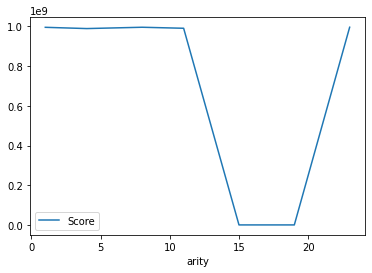

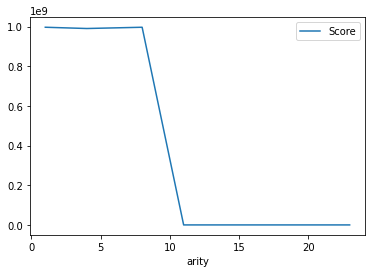

In [62]:
data.sort_values(by="arity").query("arity_test and instantiation_test and invocation_test").plot.line(x="arity", y="Score")
data_lg.sort_values(by="arity").query("arity_test and instantiation_test and invocation_test").plot.line(x="arity", y="Score")

In [48]:
data.sort_values(by="arity").query("arity_test and instantiation_test and invocation_test").sort_values(by="arity")["Score"]

14    9.959159e+08
32    9.895682e+08
10    9.962228e+08
28    9.910910e+08
8     1.064341e+01
30    7.903415e+00
16    9.962492e+08
Name: Score, dtype: float64

In [49]:
data.sort_values(by="arity").query("arity_test and invocation_test and not instantiation_test").sort_values(by="arity")["Score"]

81    2.876200e-02
13    9.957199e+08
35    9.946258e+08
88    3.981184e+03
31    9.907592e+08
89    3.981223e+03
36    9.962833e+08
90    3.981214e+03
9     9.945798e+08
37    9.962801e+08
27    9.906907e+08
82    3.981071e+03
33    9.962256e+08
83    1.086849e+01
7     1.062922e+01
34    1.010603e+01
84    7.308978e+00
85    6.911762e+00
29    1.656694e+04
86    6.155298e+00
87    5.566699e+00
15    9.961809e+08
Name: Score, dtype: float64

No transformations
ProGuard with lambda merging
ProGuard with shrinking, lambda merging and optimisation
R8 with shrinking and optimisation (target: dex)


'ax2 = data_lg.sort_values(by="arity").query("arity_test and invocation_test and not instantiation_test").plot.line(x="arity", y="Score")\nax2.set_xlabel("ariteit")\nax2.set_ylabel("verwerkingscapaciteit voor \n3 miljoen functieoproepen")\nax2.set_title("Impact ariteit op verwerkingscapaciteit functieoproepen\nna lambda merging")\nax2.yaxis.set_major_formatter(lambda val, val2: f"{round(val/10**6)}M ops/s")\nplt.savefig("average-throughput-invocation-arity-after-lambda-merging-nl.pdf", bbox_inches=\'tight\')'

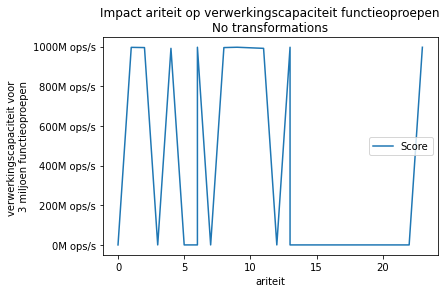

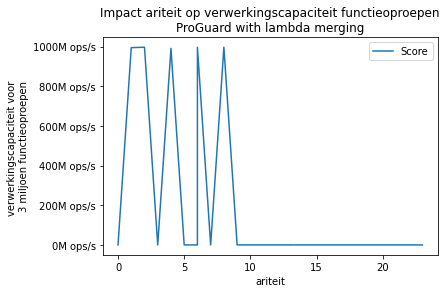

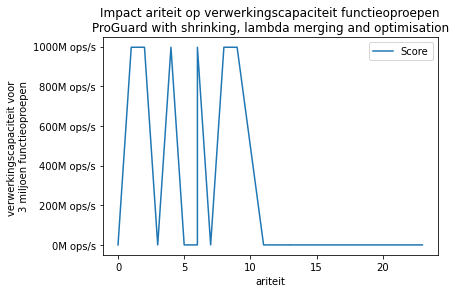

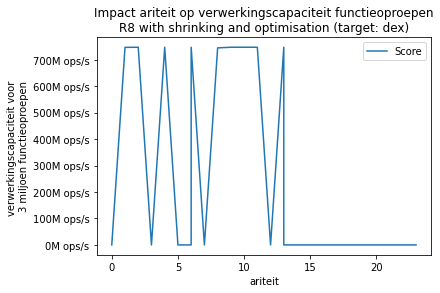

In [63]:
def plot_arity_invocation(data, df_name=""):
    try:
        ax1 = data.sort_values(by="arity").query("arity_test and invocation_test and not instantiation_test").plot.line(x="arity", y="Score")
        ax1.set_xlabel("ariteit")
        ax1.set_ylabel("verwerkingscapaciteit voor \n3 miljoen functieoproepen")
        ax1.set_title(f"Impact ariteit op verwerkingscapaciteit functieoproepen\n{df_name}")
        ax1.yaxis.set_major_formatter(lambda val, val2: f"{round(val/10**6)}M ops/s")
        plt.savefig(f"average-throughput-invocation-arity-{df_name.replace(' ', '-')}-nl.pdf", bbox_inches='tight')
    except Exception as exception:
        print(f"Exception for dataframe '{df_name}': {exception}")
        
apply_to_each_dataframe(plot_arity_invocation, True)

"""ax2 = data_lg.sort_values(by="arity").query("arity_test and invocation_test and not instantiation_test").plot.line(x="arity", y="Score")
ax2.set_xlabel("ariteit")
ax2.set_ylabel("verwerkingscapaciteit voor \n3 miljoen functieoproepen")
ax2.set_title("Impact ariteit op verwerkingscapaciteit functieoproepen\nna lambda merging")
ax2.yaxis.set_major_formatter(lambda val, val2: f"{round(val/10**6)}M ops/s")
plt.savefig("average-throughput-invocation-arity-after-lambda-merging-nl.pdf", bbox_inches='tight')"""

<AxesSubplot:xlabel='arity'>

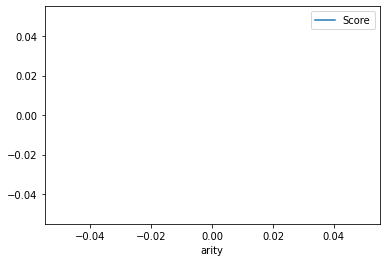

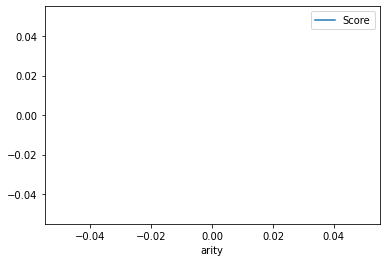

In [51]:
data.sort_values(by="arity").query("arity_test and instantiation_test and not invocation_test").plot.line(x="arity", y="Score")
data_lg.sort_values(by="arity").query("arity_test and instantiation_test and not invocation_test").plot.line(x="arity", y="Score")

In [52]:
data.query("invocation_test")["Score"].describe()

count    6.300000e+01
mean     4.103189e+08
std      4.934119e+08
min      2.876200e-02
25%      3.981062e+03
50%      3.981223e+03
75%      9.951163e+08
max      9.962969e+08
Name: Score, dtype: float64

In [53]:
data_lg.query("invocation_test")["Score"].describe()

count    6.300000e+01
mean     1.262834e+08
std      3.337781e+08
min      2.833300e-02
25%      7.475834e+00
50%      2.457211e+01
75%      5.495673e+01
max      9.962950e+08
Name: Score, dtype: float64

In [54]:
data.query("invocation_test")["inverse score"].describe()

count    6.300000e+01
mean     1.115831e+00
std      6.108515e+00
min      1.003717e-09
25%      1.004908e-09
50%      2.511791e-04
75%      2.511893e-04
max      3.476810e+01
Name: inverse score, dtype: float64

In [55]:
data_lg.query("invocation_test")["inverse score"].describe()

count    6.300000e+01
mean     1.186463e+00
std      6.190849e+00
min      1.003719e-09
25%      1.819664e-02
50%      4.069655e-02
75%      1.337649e-01
max      3.529453e+01
Name: inverse score, dtype: float64

In [56]:
median_invocation_time = data.query("invocation_test and not instantiation_test")["inverse score"].median()
print(f'{median_invocation_time / 3_000_000 * 1000**5} femto seconds per median lambda invocation')

83727.34923646138 femto seconds per median lambda invocation


In [57]:
median_invocation_time_lg = data_lg.query("invocation_test and not instantiation_test")["inverse score"].median()
print(f'{median_invocation_time_lg / 3_000_000 * 1000**3} nano seconds per median lambda group invocation, {median_invocation_time_lg / median_invocation_time} times as much as the lambda classes.')

8.968850912450863 nano seconds per median lambda group invocation, 107.11972843092386 times as much as the lambda classes.


In [58]:
mean_invocation_time = data.query("invocation_test and not instantiation_test")["inverse score"].mean()
print(f'{mean_invocation_time / 3_000_000 * 1000**3} nano seconds per mean lambda invocation.')

530.8854492121249 nano seconds per mean lambda invocation.


In [59]:
mean_invocation_time_lg = data_lg.query("invocation_test and not instantiation_test")["inverse score"].mean()
print(f'{mean_invocation_time_lg / 3_000_000 * 1000**3} nano seconds per mean lambda group invocation, {mean_invocation_time_lg / mean_invocation_time} times as much as the lambda classes.')

547.9082348133009 nano seconds per mean lambda group invocation, 1.0320648938983716 times as much as the lambda classes.


In [60]:
median_instantiation_invocation_time = data.query("instantiation_test and invocation_test")["inverse score"].median()
print(f'{median_instantiation_invocation_time / 3_000_000 * 1000**5} femto seconds per median lambda instantiation and invocation.')

0.334766117261032 femto seconds per median lambda instantiation and invocation.


In [61]:
median_instantiation_invocation_time_lg = data_lg.query("instantiation_test and invocation_test")["inverse score"].median()
print(f'{median_instantiation_invocation_time_lg / 3_000_000 * 1000**3} nano seconds per median lambda group instantiation and invocation, {median_instantiation_invocation_time_lg / median_instantiation_invocation_time} times as much as the lambda classes.')

44.49313773438095 nano seconds per median lambda group instantiation and invocation, 132908127.31710145 times as much as the lambda classes.


In [62]:
mean_instantiation_invocation_time = data.query("instantiation_test and invocation_test")["inverse score"].mean()
print(f'{mean_instantiation_invocation_time / 3_000_000 * 1000**3} nano seconds per mean lambda instantiation and invocation.')

3.8681138013618312 nano seconds per mean lambda instantiation and invocation.


In [63]:
mean_instantiation_invocation_time_lg = data_lg.query("instantiation_test and invocation_test")["inverse score"].mean()
print(f'{mean_instantiation_invocation_time_lg / 3_000_000 * 1000**3} nano seconds per mean lambda group instantiation and invocation, {mean_instantiation_invocation_time_lg / mean_instantiation_invocation_time} times as much as the lambda classes.')

42.51356260151616 nano seconds per mean lambda group instantiation and invocation, 10.990773484107057 times as much as the lambda classes.


In [64]:
median_instantiation_time = data.query("instantiation_test and not invocation_test")["inverse score"].median()
print(f'{median_instantiation_time / 3_000_000 * 1000**3} nano seconds per median lambda instantiation.')

20.114465734742858 nano seconds per median lambda instantiation.


In [65]:
median_instantiation_time_lg = data_lg.query("instantiation_test and not invocation_test")["inverse score"].median()
print(f'{median_instantiation_time_lg / 3_000_000 * 1000**3} nano seconds per median lambda group instantiation, {median_instantiation_time_lg / median_instantiation_time} times as much as the lambda classes.')

42.005988711156554 nano seconds per median lambda group instantiation, 2.088347225579122 times as much as the lambda classes.


In [66]:
mean_instantiation_time = data.query("instantiation_test and not invocation_test")["inverse score"].mean()
print(f'{mean_instantiation_time / 3_000_000 * 1000**3} nano seconds per mean lambda instantiation.')

21.06799689057393 nano seconds per mean lambda instantiation.


In [67]:
mean_instantiation_time_lg = data_lg.query("instantiation_test and not invocation_test")["inverse score"].mean()
print(f'{mean_instantiation_time_lg / 3_000_000 * 1000**3} nano seconds per mean lambda group instantiation, {mean_instantiation_time_lg / mean_instantiation_time} times as much as the lambda classes.')

42.072208199938686 nano seconds per mean lambda group instantiation, 1.9969723945973377 times as much as the lambda classes.


In [70]:
print(data.query("instantiation_test and not invocation_test")[["Benchmark", "Score", "arity", "closure_size"]].sort_values(by="closure_size").to_markdown())

|    | Benchmark                                                     |      Score |   arity |   closure_size |
|---:|:--------------------------------------------------------------|-----------:|--------:|---------------:|
| 62 | test.MyBenchmark.closure0FreeVariables3MillionInstantiations  | 4024.99    |       0 |              0 |
| 43 | test.MyBenchmark.closure0FreeVariables3MillionInstantiations  | 4014.89    |       0 |              0 |
| 20 | test.MyBenchmark.closure1FreeVariables3MillionInstantiations  |   41.1091  |       0 |              1 |
|  0 | test.MyBenchmark.closure2FreeVariables3MillionInstantiations  |   42.1631  |       0 |              2 |
| 76 | test.MyBenchmark.closure3FreeVariables3MillionInstantiations  |   32.4485  |       0 |              3 |
| 22 | test.MyBenchmark.closure4FreeVariables3MillionInstantiations  |   32.3971  |       0 |              4 |
| 78 | test.MyBenchmark.closure5FreeVariables3MillionInstantiations  |   26.2744  |       0 |              5 |
|

In [69]:
data.query("not instantiation_test and invocation_test")[["Benchmark", "Score", "arity", "closure_size"]].sort_values(by=["closure_size", "arity"])

,Benchmark,Score,arity,closure_size
61,test.MyBenchmark.closure0FreeVariables3Million...,2.907500e-02,0,0
81,test.MyBenchmark.emptyClosure0Arguments3Millio...,2.876200e-02,0,0
13,test.MyBenchmark.emptyClosure1Arguments3Millio...,9.957199e+08,1,0
35,test.MyBenchmark.emptyClosure2Arguments3Millio...,9.946258e+08,2,0
88,test.MyBenchmark.emptyClosure3Arguments3Millio...,3.981184e+03,3,0
31,test.MyBenchmark.emptyClosure4Arguments3Millio...,9.907592e+08,4,0
89,test.MyBenchmark.emptyClosure5Arguments3Millio...,3.981223e+03,5,0
36,test.MyBenchmark.emptyClosure6Arguments3Millio...,9.962833e+08,6,0
90,test.MyBenchmark.emptyClosure7Arguments3Millio...,3.981214e+03,7,0
9,test.MyBenchmark.emptyClosure8Arguments3Millio...,9.945798e+08,8,0


In [79]:
data_lg[["arity", "closure_size"]].groupby(by="closure_size").min()

,arity
closure_size,
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
